# Descarga de video y audio de youtube

In [8]:
! pip install pytube -q 

In [1]:
from pytube import YouTube

In [2]:
VIDEO_URL = 'https://youtu.be/i1FQwYYE6HI' #discurso de superman

In [3]:
yt = YouTube(VIDEO_URL)

In [4]:
yt.streams.filter(only_audio=True, file_extension='mp4').first().download(filename="ytaudio.mp4")


RegexMatchError: get_throttling_function_name: could not find match for multiple

In [16]:
import yt_dlp as youtube_dl
import subprocess

def download_youtube_audio(url):
    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
    }

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        info_dict = ydl.extract_info(url, download=False)
        video_title = info_dict.get('title', 'video')
        video_id = info_dict.get('id', 'unknown')

        ydl.download([url])

        # Convert the downloaded audio to WAV using ffmpeg
        subprocess.run(['ffmpeg', '-i', f'{video_title}.m4a', f'{video_title}.wav'])

        print(f"Audio downloaded and converted to '{video_title}.wav'")

# Example usage
youtube_url = input("Insert YouTube URL: ")
download_youtube_audio(youtube_url)


In [ ]:
! ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav

"ffmpeg" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import StandardScaler
import pywt
import IPython

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [3]:
IPython.display.Audio("./audio/Ambiental_1.wav")

In [4]:
y, sr = librosa.load("./audio/Ambiental_1.wav")
# y: serie de tiempo de la frecuencia
# sr: frecuencia de muestreo

In [5]:
# Cargar archivo de audio
audio_path = librosa.load("./audio/Ambiental_1.wav")
y, sr = librosa.load("./audio/Ambiental_1.wav")
IPython.display.Audio("./audio/Ambiental_1.wav")

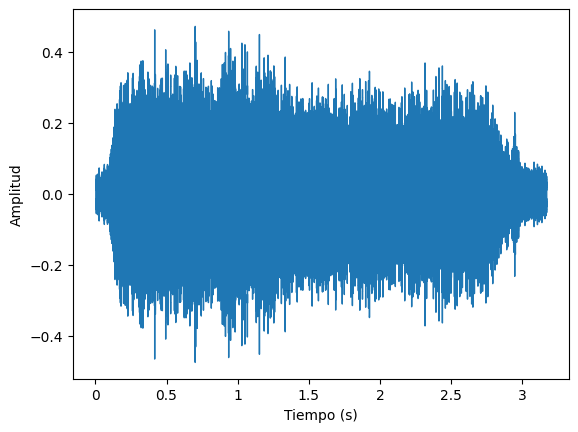

In [6]:
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

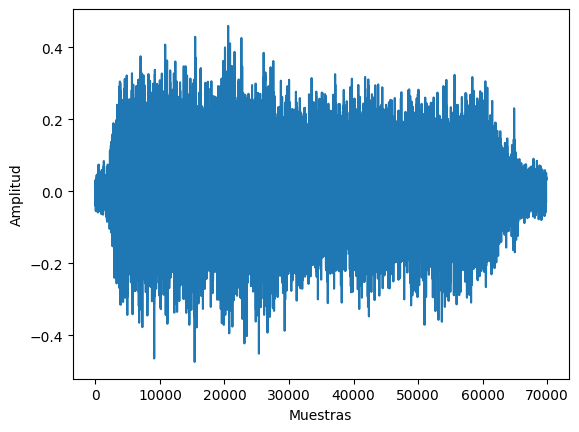

In [7]:
plt.figure()
plt.plot(y)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

#### Descripcion de MFCC --v Mel Frequency Coeficients

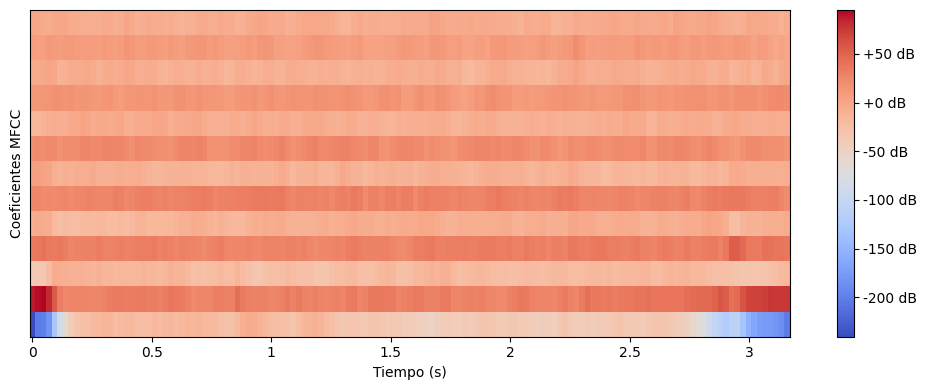

In [8]:
# Calcular MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualizar MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

#### Coeficientes   
- Coeficiente 0 (Energía o Energía Logarítmica): Representa la energía total de la señal, útil para distinguir entre sonidos fuertes y suaves.
- Coeficiente 1: Corresponde a los componentes de baja frecuencia de la señal, relacionada con la información tonal y los formantes bajos en la voz humana.
- Coeficiente 2: Representación de frecuencias bajas a medias, que son importantes para la claridad del habla.
- Coeficiente 3: Representa componentes de frecuencia media, que son importantes para distinguir entre diferentes sonidos del habla.
- Coeficientes 4-12: Capturan componentes de frecuencia más alta que corresponden a variaciones sutiles en la voz y otros sonidos.


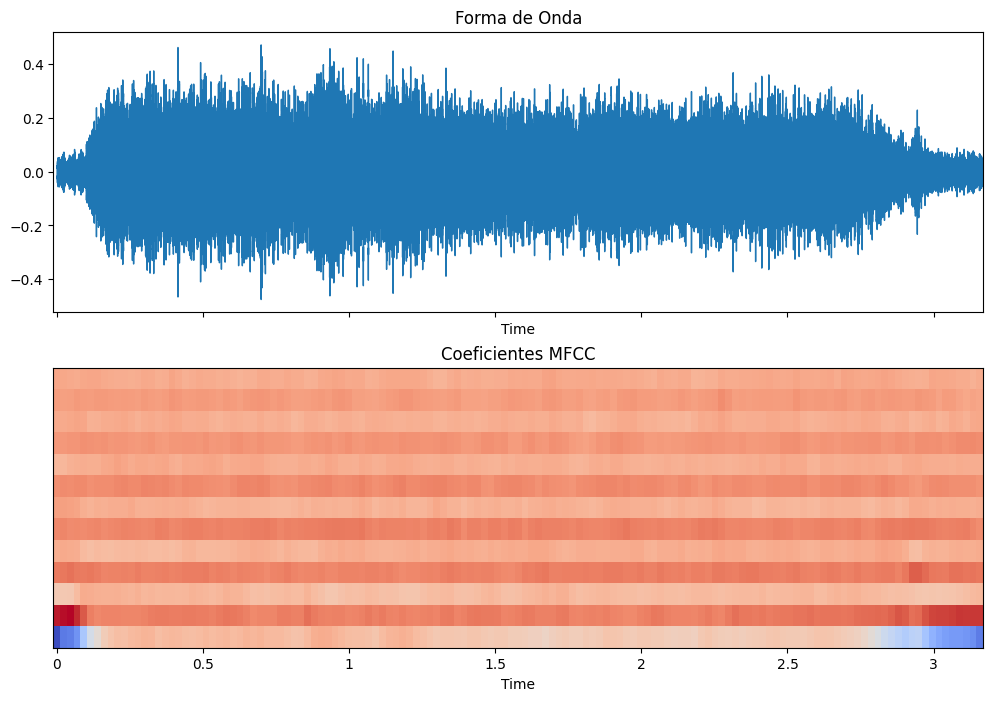

In [9]:
# Crear una figura con dos subgráficos
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

# Mostrar la forma de onda en el primer subgráfico
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Forma de Onda')

# Mostrar los coeficientes MFCC en el segundo subgráfico
img = librosa.display.specshow(mfccs, x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Coeficientes MFCC')

# Mostrar la figura
plt.show()

#### Espectrogramas y su descripcion

-Representacion visual de la intencidad de frecurnviss a lo largo del tiempo 
-uso en anlisis de patrones y visualizacion de audio

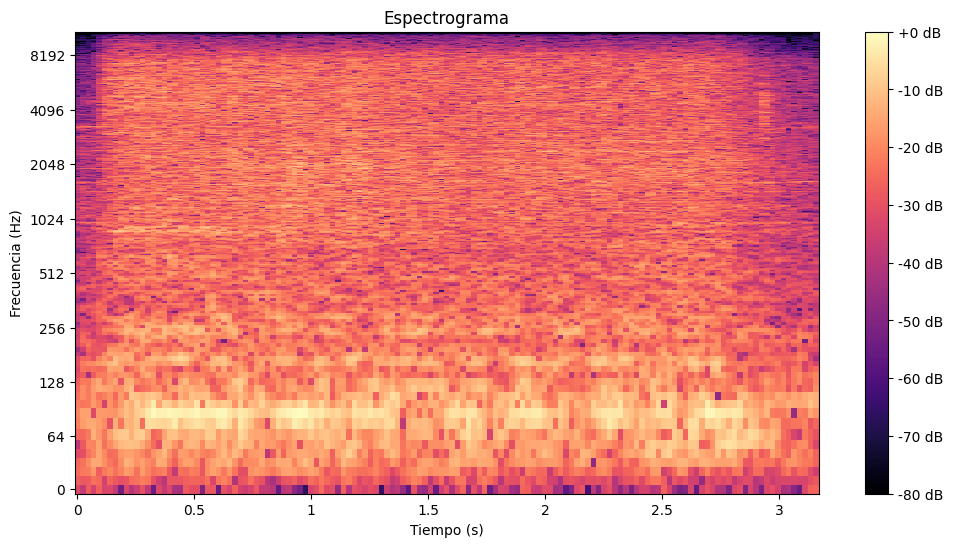

In [10]:
# Calcular el espectrograma de la señal de audio
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Visualizar el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

In [11]:
# Obtener las frecuencias y los tiempos del espectrograma
frequencies = librosa.fft_frequencies(sr=sr)
len(frequencies)

1025

In [12]:
times = librosa.frames_to_time(np.arange(S_db.shape[1]), sr=sr)

# Sumar las amplitudes a lo largo del tiempo para cada frecuencia
sum_amplitudes = np.sum(S_db, axis=1)

# Seleccionar las 10 frecuencias más representativas
top_n = 10
top_indices = np.argsort(sum_amplitudes)[-top_n:][::-1]
top_frequencies = frequencies[top_indices]
top_amplitudes = sum_amplitudes[top_indices]
top_amplitudes

array([-1293.1885, -1667.0458, -1789.6123, -2129.5305, -2179.1257,
       -2270.3662, -2380.2222, -2428.8652, -2479.5957, -2549.9768],
      dtype=float32)

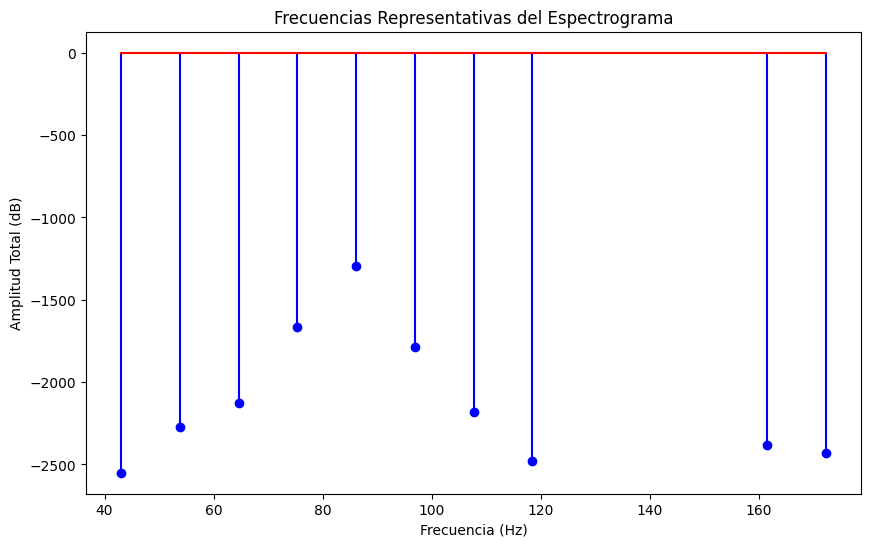

In [13]:
# Visualizar las frecuencias representativas como líneas
plt.figure(figsize=(10, 6))
plt.stem(top_frequencies, top_amplitudes, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas del Espectrograma')
plt.show()

In [14]:
#!pip install ffmpeg-python

In [1]:
#!pip install streamlit

   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
    --------------------------------------- 0.1/8.6 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/8.6 MB 4.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.6 MB 7.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/8.6 MB 10.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.6 MB 10.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.7/8.6 MB 9.7 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.6 MB 9.9 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.6 MB 9.9 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.6 MB 9.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.1/8.6 MB 6.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.5/8.6 MB 6.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.9/8.6 MB 6.9 MB/s eta 0:00:01
   --------------